Gêneros únicos no dataset:
Action
Platform
Adventure
Role-Playing
Fighting
Misc
Simulation
Racing
Puzzle
Shooter
Sports


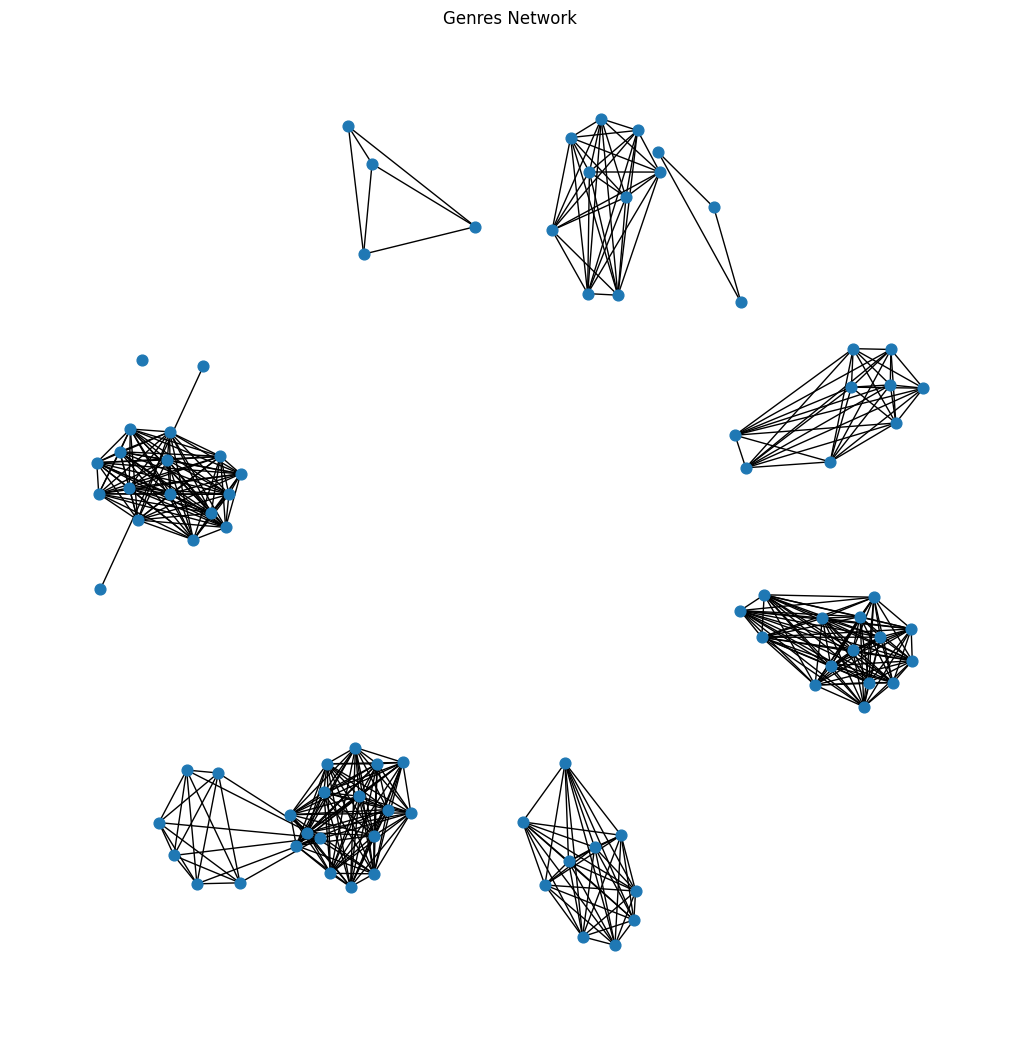

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('data_game.csv')
#Slecionando as 100 primeiras linhas para uma análise
df = df.head(100) 

#print(df)

# Filtragem e preparação dos dados
# Mantém apenas as colunas de interesse: Nome e Gênero
df_genre = df[['Name', 'Genre']].dropna()

# Criar um conjunto para armazenar gêneros únicos
unique_genres = set()

# Adicionar gêneros ao conjunto
for genres in df_genre['Genre'].str.split(','):
    genres = [genre.strip() for genre in genres]  # Remover espaços em branco
    unique_genres.update(genres)  # Adicionar gêneros ao conjunto

# Imprimir gêneros únicos
print("Gêneros únicos no dataset:")
for genre in unique_genres:
    print(genre)

# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas com base no gênero
for _, row in df.iterrows():
    genre = row['Genre']
    name = row['Name']
    
    # Adicionar o nó para o jogo
    if not G.has_node(name):
        G.add_node(name, genre=genre)
    
    # Adicionar nós e arestas para jogos com o mesmo gênero
    for other_name in df[df['Genre'] == genre]['Name']:
        if other_name != name:
            G.add_edge(name, other_name)
                

# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize= (10,10))
nx.draw(G, pos, with_labels=False, node_size=60, font_size=8) #Retirando os names dos nós para melhor visualização
plt.title("Genres Network")
plt.show()


In [2]:
#Análise descritiva básica

nodes = G.nodes()
edges = G.edges()
densidade = nx.density(G)
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()



print(f'Nós da rede: {nodes}')
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Arestas da rede: {edges}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Densidade da rede: {densidade}')



Nós da rede: ['Wii Sports', 'Wii Sports Resort', 'Wii Fit', 'Wii Fit Plus', 'FIFA 16', 'Mario & Sonic at the Olympic Games', 'FIFA 17', 'Super Mario Bros.', 'New Super Mario Bros.', 'New Super Mario Bros. Wii', 'Super Mario World', 'Super Mario Land', 'Super Mario Bros. 3', 'Super Mario 64', 'Super Mario Galaxy', 'Super Mario 3D Land', 'Super Mario All-Stars', 'New Super Mario Bros. 2', 'Donkey Kong Country', 'Crash Bandicoot 2: Cortex Strikes Back', 'Super Mario Galaxy 2', 'Super Mario Bros. 2', 'Mario Kart Wii', 'Mario Kart DS', 'Gran Turismo 3: A-Spec', 'Mario Kart 7', 'Gran Turismo 4', 'Gran Turismo', 'Gran Turismo 5', 'Mario Kart 64', 'Gran Turismo 2', 'Super Mario Kart', 'Pokemon Red/Pokemon Blue', 'Pokemon Gold/Pokemon Silver', 'Pokemon Diamond/Pokemon Pearl', 'Pokemon Ruby/Pokemon Sapphire', 'Pokemon Black/Pokemon White', 'Pokémon Yellow: Special Pikachu Edition', 'Pokemon X/Pokemon Y', 'Pokemon Omega Ruby/Pokemon Alpha Sapphire', 'Pokemon FireRed/Pokemon LeafGreen', 'Final Fan

Desenvolvedores únicos no dataset:
Infinity Ward
Hudson Soft
Hudson
Game Freak
Nintendo EAD Tokyo
Game Arts
Sledgehammer Games
Entertainment Analysis & Development Division
Rockstar North
Rockstar Leeds
Bethesda Game Studios
Treyarch
Retro Studios
SquareSoft
Good Science Studio
Nintendo
Electronic Arts
DMA Design
EA Sports
The Sims Studio
343 Industries
Ubisoft
Bungie Software
Nd Cube
EA Vancouver
Polyphony Digital
Bungie
Número de desenvolvedores: 27


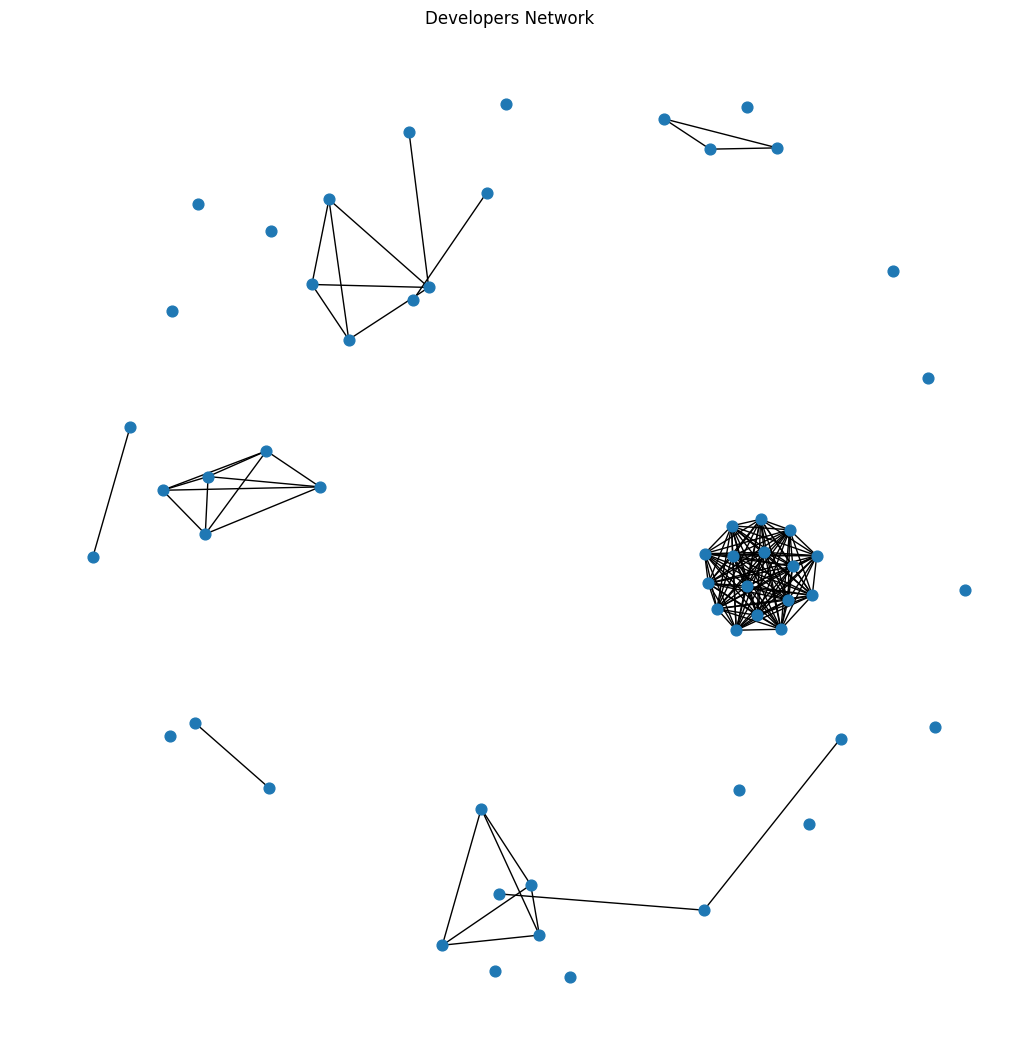

Número de componentes: 23


In [11]:
#----------------MONTANDO REDE COM OS DESENVOLVEDORES DOS GAMES----------------

# Carregar o dataset
df = pd.read_csv('data_game.csv')
#Slecionando as 100 primeiras linhas para uma análise
df = df.head(100) 

# Filtragem e preparação dos dados
# Mantém apenas as colunas de interesse: Nome e Gênero

df_developer = df[['Name', 'Developer']].dropna()

# Criar um conjunto para armazenar gêneros únicos
unique_developers = set()

# Adicionar gêneros ao conjunto
for developers in df_developer['Developer'].str.split(','):
    developers = [developer.strip() for developer in developers]  # Remover espaços em branco
    unique_developers.update(developers)  # Adicionar gêneros ao conjunto

# Imprimir gêneros únicos
print("Desenvolvedores únicos no dataset:")
for developer in unique_developers:
    print(developer)

number_developers = len(unique_developers)
print(f'Número de desenvolvedores: {number_developers}')


# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas com base nos desenvolvedores
for _, row in df_developer.iterrows():
    game = row['Name']
    developers = [developer.strip() for developer in row['Developer'].split(',')]  # Dividir múltiplos desenvolvedores
    
    # Adicionar o nó para o jogo
    if not G.has_node(game):
        G.add_node(game, developers=developers)
    
    # Conectar o jogo atual a outros jogos que compartilham pelo menos um desenvolvedor
    for developer in developers:
        for other_game, other_row in df_developer.iterrows():
            if game != other_row['Name'] and developer in [dev.strip() for dev in other_row['Developer'].split(',')]:
                G.add_edge(game, other_row['Name'], developer=developer)

            
# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize= (10,10))
nx.draw(G, pos, with_labels=False, node_size=60, font_size=8) #Retirando os names dos nós para melhor visualização
plt.title("Developers Network")
plt.show()

#Verificando o número de comunidades
number_communities = nx.number_connected_components(G)
print(f'Número de componentes: {number_communities}')

In [4]:
#Análise descritiva básica

nodes = G.nodes()
edges = G.edges()
densidade = nx.density(G)
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()



print(f'Nós da rede: {nodes}')
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Arestas da rede: {edges}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Densidade da rede: {densidade}')

Nós da rede: ['Wii Sports', 'Mario Kart Wii', 'Wii Sports Resort', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Mario Kart DS', 'Wii Fit', 'Wii Fit Plus', 'Brain Age: Train Your Brain in Minutes a Day', 'Brain Age 2: More Training in Minutes a Day', 'Animal Crossing: Wild World', 'Super Mario Galaxy', 'Super Mario 3D Land', 'New Super Mario Bros. 2', 'Animal Crossing: New Leaf', 'Kinect Adventures!', 'Grand Theft Auto V', 'Grand Theft Auto: San Andreas', 'Grand Theft Auto: Vice City', 'Grand Theft Auto IV', 'Gran Turismo 3: A-Spec', 'Gran Turismo 4', 'Gran Turismo', 'Gran Turismo 5', 'Gran Turismo 2', 'Call of Duty: Modern Warfare 3', 'Call of Duty: Modern Warfare 2', 'Call of Duty: Ghosts', 'Call of Duty 4: Modern Warfare', 'Call of Duty: Advanced Warfare', 'Call of Duty: Black Ops', 'Call of Duty: Black Ops II', 'Grand Theft Auto III', 'Super Smash Bros. Brawl', 'Mario Kart 7', 'Halo 3', 'Halo 2', 'Halo: Reach', 'Just Dance 3', 'Just Dance 2', 'Final Fantasy VII

Total de vendas em cada região:
NA_Sales: 700.29
EU_Sales: 422.45
JP_Sales: 204.79
Other_Sales: 131.36

Correlações entre as regiões:
Correlação entre NA_Sales e EU_Sales: 0.56
Correlação entre NA_Sales e JP_Sales: 0.26
Correlação entre NA_Sales e Other_Sales: 0.36
Correlação entre EU_Sales e JP_Sales: 0.25
Correlação entre EU_Sales e Other_Sales: 0.50
Correlação entre JP_Sales e Other_Sales: -0.04

Densidade do grafo: 0.3333

Número de componentes: 2


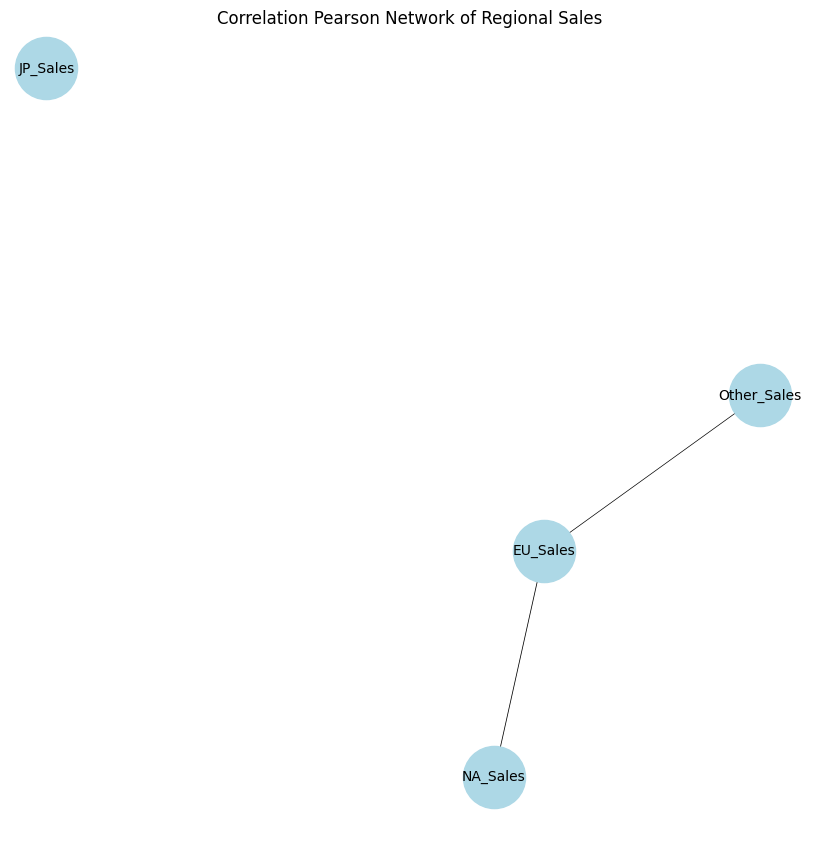

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar o dataset
df = pd.read_csv('data_game.csv')

# Selecionando as 100 primeiras linhas para uma análise
df = df.head(100) 

# Mantém apenas as colunas de interesse: Vendas Regionais
df_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].dropna()

# Calcular e exibir a quantidade total de vendas em cada região
total_sales = df_sales.sum()
print("Total de vendas em cada região:")
for region, total in total_sales.items():
    print(f"{region}: {total:.2f}")

# Inicializando o grafo vazio
G = nx.Graph()

# Adicionar nós para cada região
regions = df_sales.columns.tolist()
G.add_nodes_from(regions)

# Dicionário para armazenar as correlações
correlation_results = {}

# Calculando a correlação de Pearson entre as regiões e adicionando as arestas
for i in range(len(regions)):
    for j in range(i + 1, len(regions)):
        region1 = regions[i]
        region2 = regions[j]
        correlation, _ = pearsonr(df_sales[region1], df_sales[region2])
        
        # Armazenar o resultado da correlação
        correlation_results[(region1, region2)] = correlation
        
        # Considera uma correlação forte se for maior que 0.5
        if abs(correlation) > 0.5:
            G.add_edge(region1, region2, weight=correlation)

# Exibir os resultados das correlações
print("\nCorrelações entre as regiões:")
for pair, corr_value in correlation_results.items():
    print(f"Correlação entre {pair[0]} e {pair[1]}: {corr_value:.2f}")

# Calcular a densidade do grafo
density = nx.density(G)
print(f'\nDensidade do grafo: {density:.4f}')

# Verificando o número de comunidades
number_communities = nx.number_connected_components(G)
print(f'\nNúmero de componentes: {number_communities}')

# Desenhando o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize=(8, 8))

# A cor e espessura das arestas indicam a força da correlação
edges = G.edges(data=True)
weights = [abs(data['weight']) for _, _, data in edges]
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, width=weights)

plt.title("Correlation Pearson Network of Regional Sales")
plt.show()


ANÁLISE COM OS VALORES DE CRITICAS DO SITE DO METACRITIC


Análise Descritiva para a rede "Rede de Jogos - Critic Score > 80":
Número de nós: 86
Número de arestas: 94
Densidade da rede: 0.0257
Distribuição de graus: {1: 36, 2: 15, 3: 19, 4: 7, 7: 1, 5: 6, 0: 2}
Coeficiente de clustering médio: 0.0000

Análise Topológica para a rede "Rede de Jogos - Critic Score > 80":
Número de comunidades: 25
Spreading (coeficiente de assortatividade): 0.5796
Centralidade (degree): {'Call of Duty: Black Ops': 0.08235294117647059, 'Grand Theft Auto III': 0.058823529411764705, 'Super Mario Galaxy': 0.058823529411764705, 'Animal Crossing: New Leaf': 0.058823529411764705, 'FIFA Soccer 13': 0.058823529411764705}


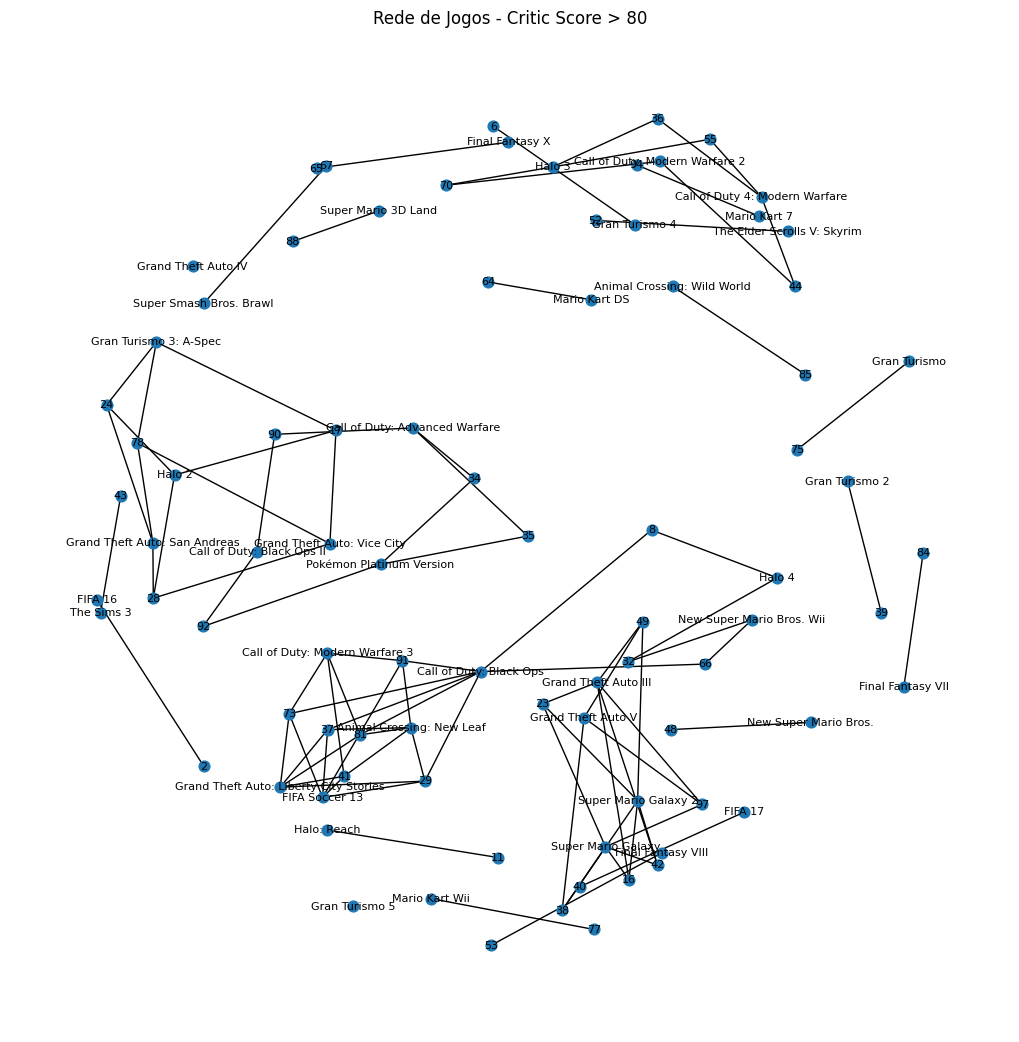


Análise Descritiva para a rede "Rede de Jogos - Critic Score <= 80":
Número de nós: 22
Número de arestas: 10
Densidade da rede: 0.0433
Distribuição de graus: {0: 8, 2: 6, 1: 8}
Coeficiente de clustering médio: 0.0000

Análise Topológica para a rede "Rede de Jogos - Critic Score <= 80":
Número de comunidades: 13
Spreading (coeficiente de assortatividade): 1.0000
Centralidade (degree): {'Wii Sports Resort': 0.09523809523809523, 13: 0.09523809523809523, 15: 0.09523809523809523, 'Wii Fit': 0.09523809523809523, 3: 0.09523809523809523}


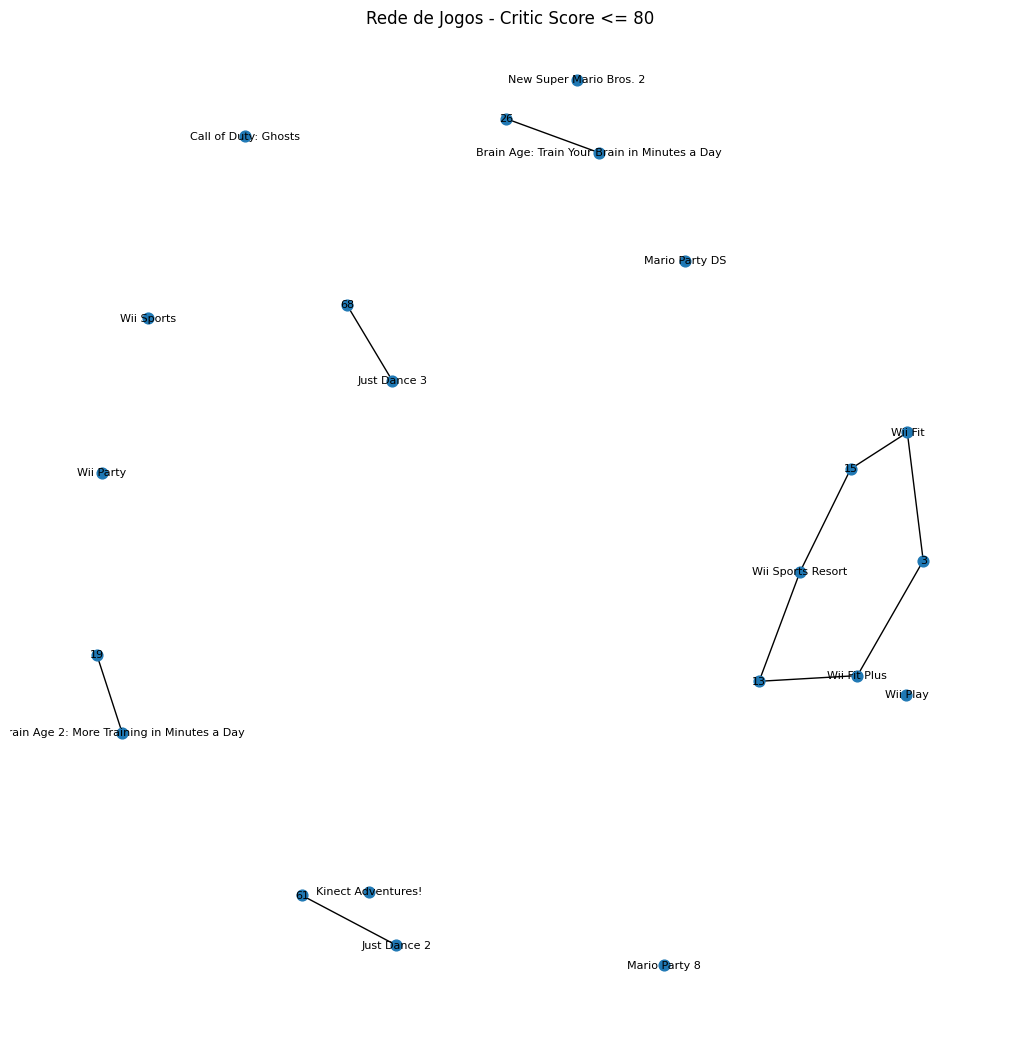

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Carregar o dataset
df = pd.read_csv('data_game.csv')

# Selecionar as 100 primeiras linhas para uma análise
df = df.head(100)

# Filtragem e preparação dos dados
df_critic_score = df[['Name', 'Critic_Score']].dropna()

# Função para calcular e imprimir análise descritiva e topológica
def analyze_network(G, title):
    # Análise descritiva
    number_of_nodes = G.number_of_nodes()
    number_of_edges = G.number_of_edges()
    density = nx.density(G)
    degree_distribution = dict(Counter(dict(G.degree()).values()))
    clustering_coefficient = nx.average_clustering(G)
    
    print(f'\nAnálise Descritiva para a rede "{title}":')
    print(f'Número de nós: {number_of_nodes}')
    print(f'Número de arestas: {number_of_edges}')
    print(f'Densidade da rede: {density:.4f}')
    print(f'Distribuição de graus: {degree_distribution}')
    print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

    # Análise topológica
    communities = list(nx.connected_components(G))
    spreading = nx.degree_assortativity_coefficient(G)
    centrality = nx.degree_centrality(G)
    
    print(f'\nAnálise Topológica para a rede "{title}":')
    print(f'Número de comunidades: {len(communities)}')
    print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
    print(f'Centralidade (degree): {dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

    # Desenhar o grafo
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=60, font_size=8)  # Exibir os nomes dos nós
    plt.title(title)
    plt.show()

# Função para construir e analisar a rede
def build_and_analyze_network(df_filtered, title, threshold=0.5):
    # Criar um grafo vazio
    G = nx.Graph()

    # Adicionar nós e arestas com base nos User_Scores
    for _, row in df_filtered.iterrows():
        game = row['Name']
        
        # Adicionar o nó para o jogo
        if not G.has_node(game):
            G.add_node(game, score=row['Critic_Score'])
        
        # Conectar o jogo atual a outros jogos que compartilham um Critic_Score próximo
        for other_game, other_row in df_filtered.iterrows():
            if game != other_row['Name']:
                score_diff = abs(float(row['Critic_Score']) - float(other_row['Critic_Score']))
                if score_diff <= threshold:  # Criar aresta apenas se a diferença for menor ou igual ao threshold
                    G.add_edge(game, other_game)

    # Analisar a rede
    analyze_network(G, title)

# Criar duas redes: uma com Critic_Score > 80 e outra com Critic_Score <= 80
df_high_score = df_critic_score[df_critic_score['Critic_Score'].astype(float) > 80]
df_low_score = df_critic_score[df_critic_score['Critic_Score'].astype(float) <= 80]

# Montar e analisar a rede para jogos com Critic_Score > 80
build_and_analyze_network(df_high_score, "Rede de Jogos - Critic Score > 80")

# Montar e analisar a rede para jogos com Critic_Score <= 80
build_and_analyze_network(df_low_score, "Rede de Jogos - Critic Score <= 80")



Análise Descritiva para a rede "Rede de Jogos - User Score > 8":
Número de nós: 54
Número de arestas: 575
Densidade da rede: 0.4018
Distribuição de graus: {21: 12, 23: 9, 24: 2, 19: 6, 14: 1, 25: 9, 16: 4, 26: 7, 12: 2, 10: 2}
Coeficiente de clustering médio: 0.0000

Análise Topológica para a rede "Rede de Jogos - User Score > 8":
Número de comunidades: 1
Spreading (coeficiente de assortatividade): -0.1288
Centralidade (degree): {'Mario Kart DS': 0.49056603773584906, 'Grand Theft Auto: Vice City': 0.49056603773584906, 'Animal Crossing: Wild World': 0.49056603773584906, 'Gran Turismo': 0.49056603773584906, 'Animal Crossing: New Leaf': 0.49056603773584906}


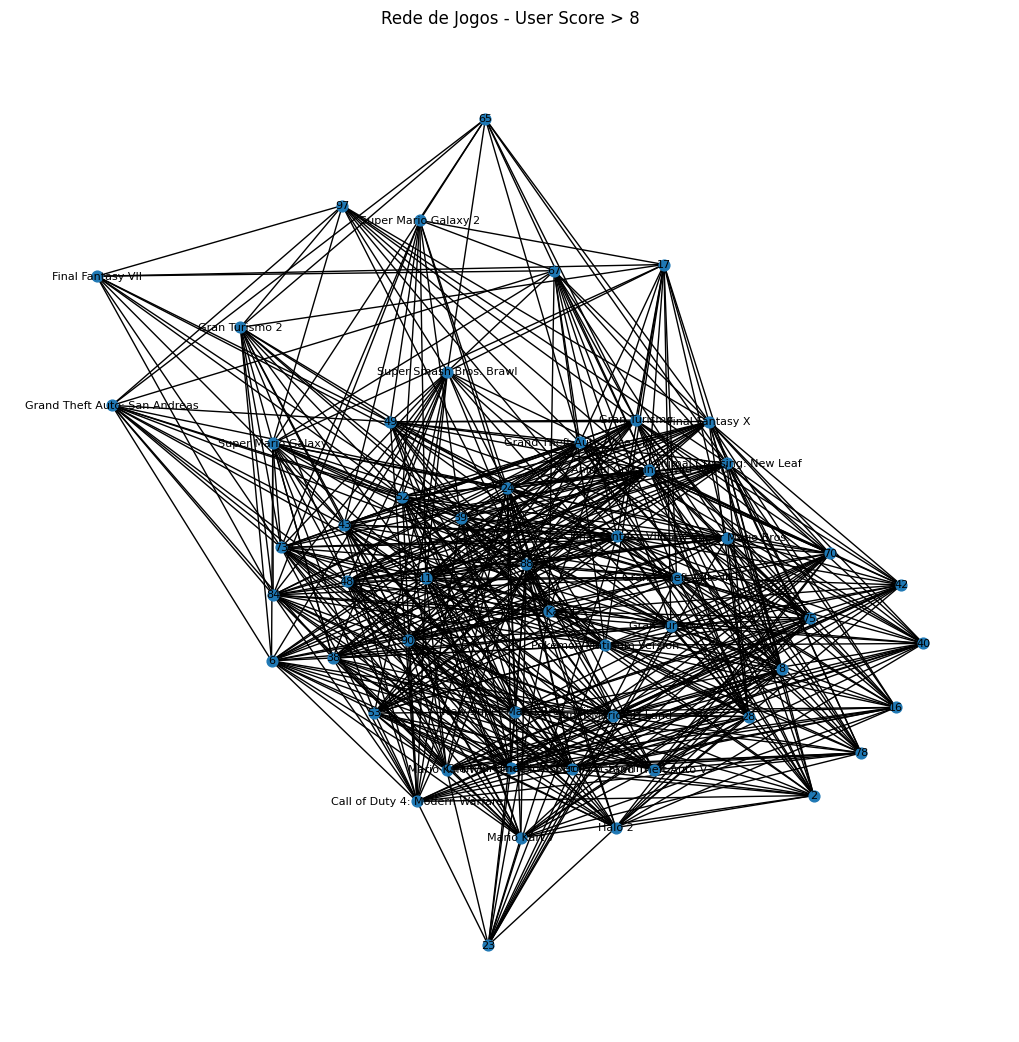


Análise Descritiva para a rede "Rede de Jogos - User Score <= 8":
Número de nós: 62
Número de arestas: 308
Densidade da rede: 0.1629
Distribuição de graus: {12: 2, 11: 4, 15: 6, 13: 5, 14: 5, 17: 5, 16: 5, 9: 4, 5: 6, 7: 4, 10: 2, 0: 2, 6: 2, 3: 1, 1: 5, 18: 1, 2: 3}
Coeficiente de clustering médio: 0.0000

Análise Topológica para a rede "Rede de Jogos - User Score <= 8":
Número de comunidades: 5
Spreading (coeficiente de assortatividade): 0.6392
Centralidade (degree): {'Gran Turismo 5': 0.29508196721311475, 54: 0.27868852459016397, 57: 0.27868852459016397, 'Grand Theft Auto IV': 0.27868852459016397, 'The Sims 3': 0.27868852459016397}


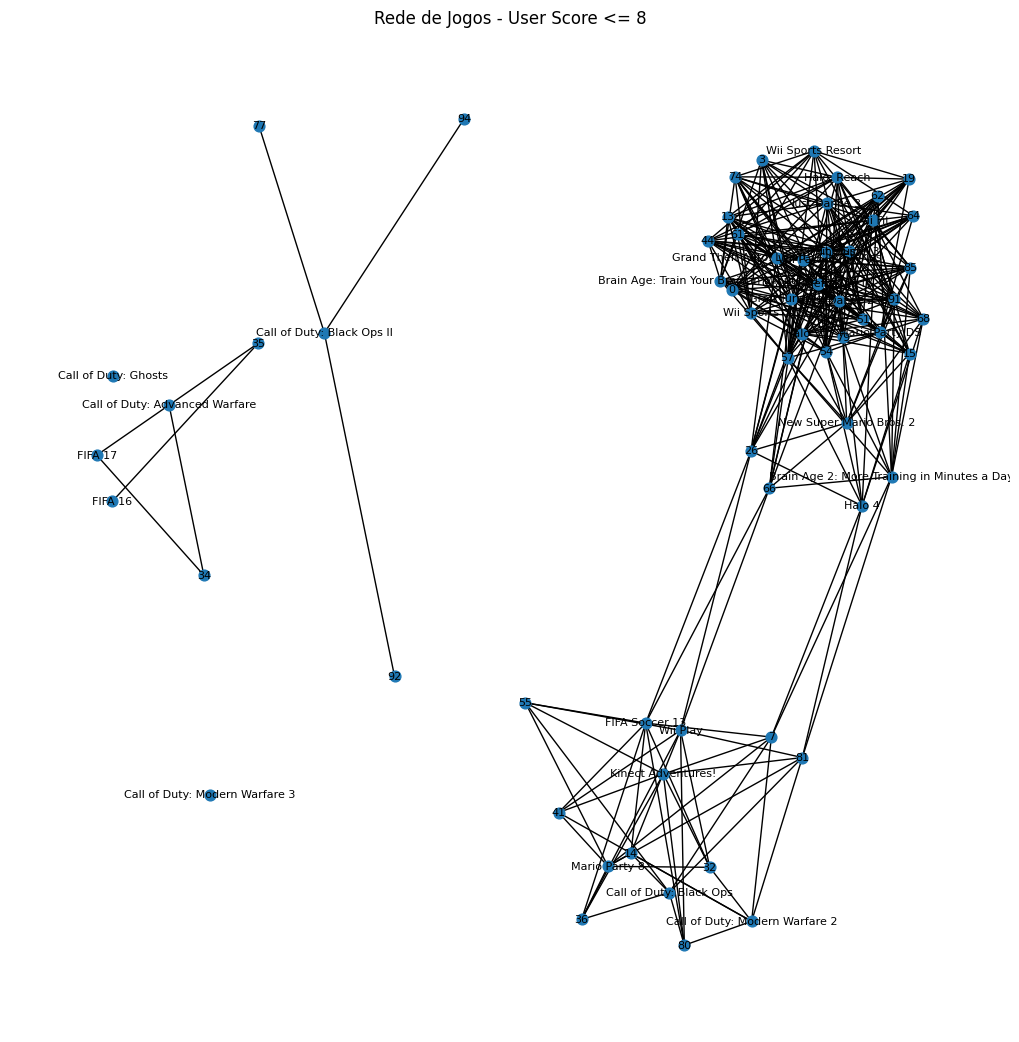

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Carregar o dataset
df = pd.read_csv('data_game.csv')

# Selecionar as 100 primeiras linhas para uma análise
df = df.head(100)

# Filtragem e preparação dos dados
df_user_score = df[['Name', 'User_Score']].dropna()

# Função para calcular e imprimir análise descritiva e topológica
def analyze_network(G, title):
    # Análise descritiva
    number_of_nodes = G.number_of_nodes()
    number_of_edges = G.number_of_edges()
    density = nx.density(G)
    degree_distribution = dict(Counter(dict(G.degree()).values()))
    clustering_coefficient = nx.average_clustering(G)
    
    print(f'\nAnálise Descritiva para a rede "{title}":')
    print(f'Número de nós: {number_of_nodes}')
    print(f'Número de arestas: {number_of_edges}')
    print(f'Densidade da rede: {density:.4f}')
    print(f'Distribuição de graus: {degree_distribution}')
    print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

    # Análise topológica
    communities = list(nx.connected_components(G))
    spreading = nx.degree_assortativity_coefficient(G)
    centrality = nx.degree_centrality(G)
    
    print(f'\nAnálise Topológica para a rede "{title}":')
    print(f'Número de comunidades: {len(communities)}')
    print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
    print(f'Centralidade (degree): {dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

    # Desenhar o grafo
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=60, font_size=8)  # Exibir os nomes dos nós
    plt.title(title)
    plt.show()

# Função para construir e analisar a rede
def build_and_analyze_network(df_filtered, title, threshold=0.5):
    # Criar um grafo vazio
    G = nx.Graph()

    # Adicionar nós e arestas com base nos User_Scores
    for _, row in df_filtered.iterrows():
        game = row['Name']
        
        # Adicionar o nó para o jogo
        if not G.has_node(game):
            G.add_node(game, score=row['User_Score'])
        
        # Conectar o jogo atual a outros jogos que compartilham um User_Score próximo
        for other_game, other_row in df_filtered.iterrows():
            if game != other_row['Name']:
                score_diff = abs(float(row['User_Score']) - float(other_row['User_Score']))
                if score_diff <= threshold:  # Criar aresta apenas se a diferença for menor ou igual ao threshold
                    G.add_edge(game, other_game)

    # Analisar a rede
    analyze_network(G, title)

# Criar duas redes: uma com User_Score > 8 e outra com User_Score <= 8
df_high_score = df_user_score[df_user_score['User_Score'].astype(float) > 8]
df_low_score = df_user_score[df_user_score['User_Score'].astype(float) <= 8]

# Montar e analisar a rede para jogos com User_Score > 8
build_and_analyze_network(df_high_score, "Rede de Jogos - User Score > 8")

# Montar e analisar a rede para jogos com User_Score <= 8
build_and_analyze_network(df_low_score, "Rede de Jogos - User Score <= 8")
